In [139]:
import pandas as pd

In [140]:
data = pd.read_csv(r"G:\DATA ANALYTICS STUFF\DATASET\Data Store.csv")

In [141]:
data.head()

,DATE,DISTRIBUTOR CODE,DISTRIBUTOR NAME,REGION,AREA,DISTRICT,STORE NAME 1,PRODUCT NAME,MODEL,CATEGORY,QUANTITY,UNIT PRICE,VALUE
0,01-01-19,2122577,PT. Citra Kreasi Makmur,Java,Surabaya,Surabaya,Hartono Sidoarjo,DRY IRON - HD1173/40,HD1173/40,Garment Care,3,"273,000","819,000"
1,01-01-19,2122577,PT. Citra Kreasi Makmur,Java,Surabaya,Surabaya,Hartono Sidoarjo,DRY IRON - HD1173/80,HD1173/80,Garment Care,1,"273,000","273,000"
2,01-01-19,2122577,PT. Citra Kreasi Makmur,Java,Surabaya,Surabaya,Hartono Sidoarjo,DRY IRON - HD1173/50,HD1173/50,Garment Care,1,"273,000","273,000"
3,01-01-19,2122577,PT. Citra Kreasi Makmur,Java,Surabaya,Surabaya,Hartono Sidoarjo,DRY IRON - HD1172/99,HD1172/99,Garment Care,5,"299,500","1,497,500"
4,01-01-19,2122577,PT. Citra Kreasi Makmur,Java,Surabaya,Surabaya,Hartono Sidoarjo,STEAM IRON - GC3920/24,GC3920/24,Garment Care,1,"1,050,000","1,050,000"


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54448 entries, 0 to 54447
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATE              54448 non-null  object
 1   DISTRIBUTOR CODE  54448 non-null  object
 2   DISTRIBUTOR NAME  54448 non-null  object
 3   REGION            54448 non-null  object
 4   AREA              54448 non-null  object
 5   DISTRICT          54448 non-null  object
 6   STORE NAME 1      54448 non-null  object
 7   PRODUCT NAME      54448 non-null  object
 8   MODEL             54448 non-null  object
 9   CATEGORY          54448 non-null  object
 10   QUANTITY         54448 non-null  int64 
 11   UNIT PRICE       54448 non-null  object
 12   VALUE            54448 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.4+ MB


In [143]:
data.columns

Index(['DATE', 'DISTRIBUTOR CODE', 'DISTRIBUTOR NAME', 'REGION', 'AREA',
       'DISTRICT', 'STORE NAME 1', 'PRODUCT NAME', 'MODEL', 'CATEGORY',
       ' QUANTITY ', ' UNIT PRICE', ' VALUE'],
      dtype='object')

In [144]:
data = data.rename(columns={' UNIT PRICE':'UNIT PRICE'})

In [145]:
data = data.rename(columns={' QUANTITY ':'QUANTITY'})

In [146]:
data = data.rename(columns={' VALUE':'VALUE'})

In [147]:
data.columns

Index(['DATE', 'DISTRIBUTOR CODE', 'DISTRIBUTOR NAME', 'REGION', 'AREA',
       'DISTRICT', 'STORE NAME 1', 'PRODUCT NAME', 'MODEL', 'CATEGORY',
       'QUANTITY', 'UNIT PRICE', 'VALUE'],
      dtype='object')

In [148]:
data['UNIT PRICE'] = data['UNIT PRICE'].str.replace(',','').astype(int)
data['VALUE'] = data['VALUE'].str.replace(',','').astype(int)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54448 entries, 0 to 54447
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATE              54448 non-null  object
 1   DISTRIBUTOR CODE  54448 non-null  object
 2   DISTRIBUTOR NAME  54448 non-null  object
 3   REGION            54448 non-null  object
 4   AREA              54448 non-null  object
 5   DISTRICT          54448 non-null  object
 6   STORE NAME 1      54448 non-null  object
 7   PRODUCT NAME      54448 non-null  object
 8   MODEL             54448 non-null  object
 9   CATEGORY          54448 non-null  object
 10  QUANTITY          54448 non-null  int64 
 11  UNIT PRICE        54448 non-null  int32 
 12  VALUE             54448 non-null  int32 
dtypes: int32(2), int64(1), object(10)
memory usage: 5.0+ MB


In [150]:
data.describe()

,QUANTITY,UNIT PRICE,VALUE
count,54448.000000,5.444800e+04,5.444800e+04
mean,1.959705,4.855439e+05,9.117055e+05
std,2.970229,2.496254e+05,1.395832e+06
min,1.000000,4.200000e+04,4.200000e+04
25%,1.000000,2.995000e+05,3.970000e+05
50%,1.000000,5.350000e+05,6.200000e+05
75%,2.000000,6.200000e+05,9.980000e+05
max,185.000000,3.300000e+06,5.540750e+07


In [151]:
order_volume = data.groupby('STORE NAME 1')['QUANTITY'].sum()

In [152]:
order_volume = pd.DataFrame(order_volume).reset_index()

In [153]:
cust_segment_by_order_volume = []
for i in order_volume['QUANTITY']:
    if i > 1000:
        cust_segment_by_order_volume.append('Large')
    if i > 100 and i <= 1000:
        cust_segment_by_order_volume.append('Medium')
    if i <= 100:
        cust_segment_by_order_volume.append('Small')

In [154]:
order_volume['Size'] = cust_segment_by_order_volume

In [155]:
order_volume.head(10)

,STORE NAME 1,QUANTITY,Size
0,555,93,Small
1,8 Saudara,240,Medium
2,A.Fauzy,1109,Large
3,A.Takrib Kyaimojo,199,Medium
4,Abadi Elektronik,152,Medium
5,Abdi Karya Supermarket,32,Small
6,Ace Alam Sutra,11,Small
7,Ace Artha Gading,160,Medium
8,Ace Bintaro,128,Medium
9,Ace Central Park,64,Small


In [156]:
order_vary = data.groupby('STORE NAME 1')['CATEGORY'].value_counts()

In [157]:
order_vary = pd.DataFrame(order_vary)

In [158]:
order_vary = order_vary.rename(columns={'CATEGORY':'qty'})

In [159]:
order_vary.head(10)

qty
STORE NAME 1 CATEGORY               
555          Povos                19
             Garment Care         15
             Kitchen Appliances   10
8 Saudara    Garment Care         59
             Povos                56
             Kitchen Appliances   46
             Beauty                1
A.Fauzy      Kitchen Appliances  102
             Povos               102
             Garment Care         77

In [160]:
cust_class = data.groupby('STORE NAME 1')['CATEGORY'].nunique()

In [161]:
cust_class = pd.DataFrame(cust_class).reset_index()

In [162]:
category_variation = []
for i in cust_class['CATEGORY']:
    if i <=3:
       category_variation.append('Univariate')
    if i >3:
        category_variation.append('Multivariate')

In [163]:
cust_class['VARIATION'] = category_variation

In [164]:
cust_class.head(10)

,STORE NAME 1,CATEGORY,VARIATION
0,555,3,Univariate
1,8 Saudara,4,Multivariate
2,A.Fauzy,4,Multivariate
3,A.Takrib Kyaimojo,4,Multivariate
4,Abadi Elektronik,3,Univariate
5,Abdi Karya Supermarket,3,Univariate
6,Ace Alam Sutra,4,Multivariate
7,Ace Artha Gading,6,Multivariate
8,Ace Bintaro,6,Multivariate
9,Ace Central Park,6,Multivariate


In [165]:
customer_clustering = pd.merge(order_volume,cust_class,how='outer',right_on='STORE NAME 1',left_on='STORE NAME 1')

In [166]:
import numpy as np
np_size = np.array(customer_clustering['Size'])
np_variate = np.array(customer_clustering['VARIATION'])
clustering = np_size + ' '+ np_variate

In [167]:
clustering = list(clustering)

In [168]:
customer_clustering['Size Variation'] = clustering

In [169]:
customer_cluster = []
for i in customer_clustering['Size Variation']:
    if i == 'Small Univariate':
        customer_cluster.append('Agen Kecil')
    if i == 'Medium Univariate':
        customer_cluster.append('Outlet')
    if i == 'Large Univariate':
        customer_cluster.append('Agen Besar')
    if i == 'Small Multivariate':
        customer_cluster.append('Retail')
    if i == 'Medium Multivariate':
        customer_cluster.append('Retail Sedang')
    if i == 'Large Multivariate':
        customer_cluster.append('Grosir')

In [170]:
customer_clustering['Clustering'] = customer_cluster

In [171]:
customer_clustering

,STORE NAME 1,QUANTITY,Size,CATEGORY,VARIATION,Size Variation,Clustering
0,555,93,Small,3,Univariate,Small Univariate,Agen Kecil
1,8 Saudara,240,Medium,4,Multivariate,Medium Multivariate,Retail Sedang
2,A.Fauzy,1109,Large,4,Multivariate,Large Multivariate,Grosir
3,A.Takrib Kyaimojo,199,Medium,4,Multivariate,Medium Multivariate,Retail Sedang
4,Abadi Elektronik,152,Medium,3,Univariate,Medium Univariate,Outlet
...,...,...,...,...,...,...,...
359,Yellow Mart,175,Medium,6,Multivariate,Medium Multivariate,Retail Sedang
360,Yogya Kepatihan,86,Small,5,Multivariate,Small Multivariate,Retail
361,Yogya Riau,287,Medium,6,Multivariate,Medium Multivariate,Retail Sedang
362,Yogya Sumber Sari Junction,58,Small,5,Multivariate,Small Multivariate,Retail


In [172]:
import matplotlib.pyplot as plt

In [173]:
top_product_sales = data.groupby('PRODUCT NAME')['QUANTITY'].sum().sort_values(ascending=False)

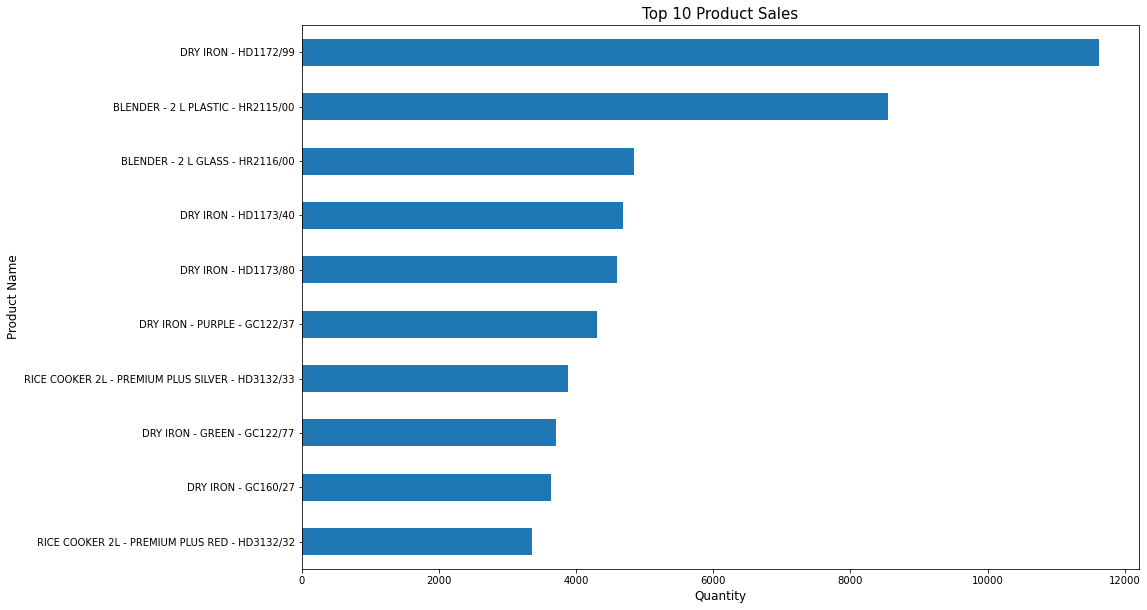

In [174]:
top_10_product_sales = top_product_sales
plt.figure(figsize=(15,10))
(top_10_product_sales.sort_values(ascending=False).head(10)).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Product Sales', fontsize=15)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.show()

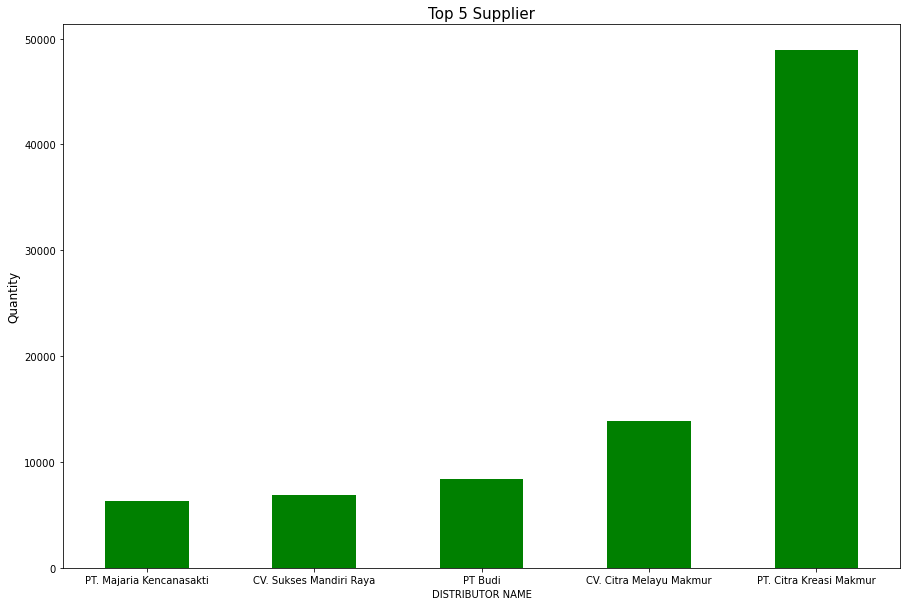

In [175]:
# Top Supplier
top_supplier = data.groupby('DISTRIBUTOR NAME')['QUANTITY'].sum()
plt.figure(figsize=(15,10))
(top_supplier.sort_values(ascending=False)).head(5).sort_values(ascending=True).plot(color='green',kind='bar')
plt.title('Top 5 Supplier', fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.show()

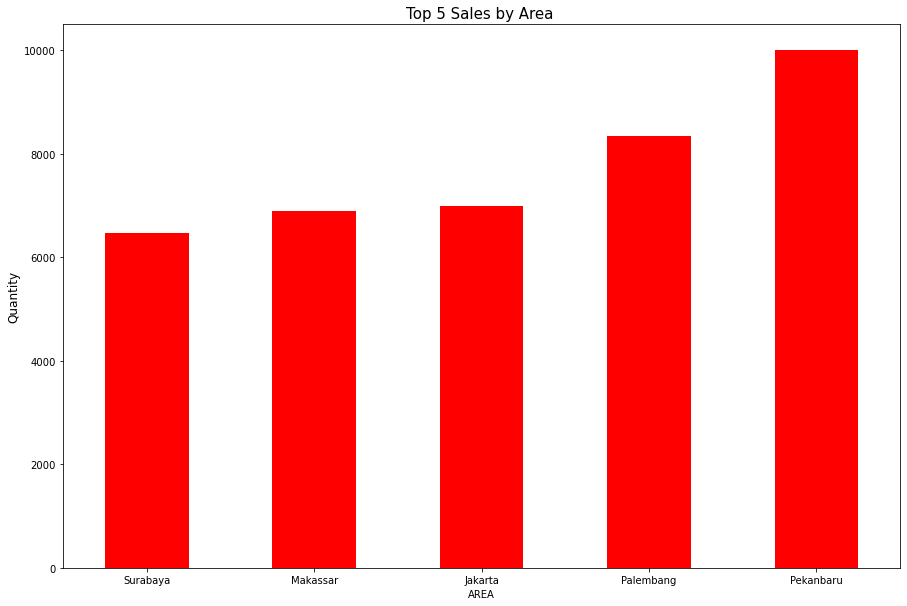

In [176]:
# Top 5 Sales by Area
plt.figure(figsize=(15,10))
(data.groupby('AREA')['QUANTITY'].sum().sort_values(ascending=False)).head(5).sort_values(ascending=True).plot(color='red',kind='bar')
plt.title('Top 5 Sales by Area ', fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.show()

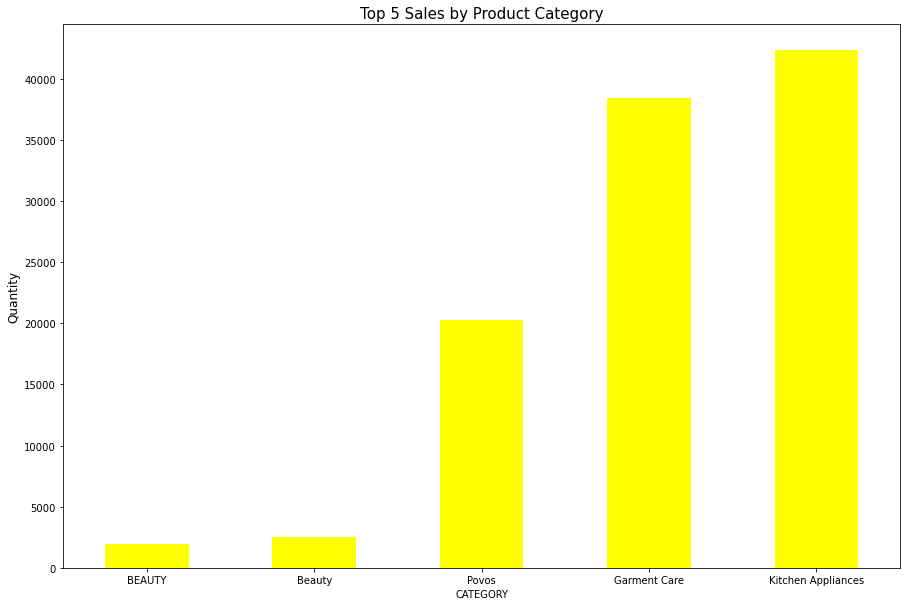

In [177]:
# Top 5 Sales by Product Category
plt.figure(figsize=(15,10))
(data.groupby('CATEGORY')['QUANTITY'].sum().sort_values(ascending=False)).head(5).sort_values(ascending=True).plot(color='yellow',kind='bar')
plt.title('Top 5 Sales by Product Category', fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [178]:
# Sales in Particular Period
time_series_sales = data[['DATE','QUANTITY']].copy()

In [179]:
time_series_sales['DATE'] = pd.to_datetime(time_series_sales['DATE'], format='%d-%m-%y')

In [180]:
time_series_sales = time_series_sales.groupby('DATE')['QUANTITY'].sum()

In [181]:
time_series_sales

DATE
2019-01-01     721
2019-01-02    2996
2019-01-03    3276
2019-01-04    3582
2019-01-05    3866
2019-01-06    3176
2019-01-07    2896
2019-01-08    3244
2019-01-09    3049
2019-01-10    3264
2019-01-11    3817
2019-01-12    3967
2019-01-13    3428
2019-01-14    4185
2019-01-15    4219
2019-01-16    3241
2019-01-17    3191
2019-01-18    4134
2019-01-19    3877
2019-01-20    3439
2019-01-21    3869
2019-01-22    3147
2019-01-23    3154
2019-01-24    2062
2019-01-25    3955
2019-01-26    4269
2019-01-27    3421
2019-01-28    3317
2019-01-29    3047
2019-01-30    3750
2019-01-31    5143
Name: QUANTITY, dtype: int64

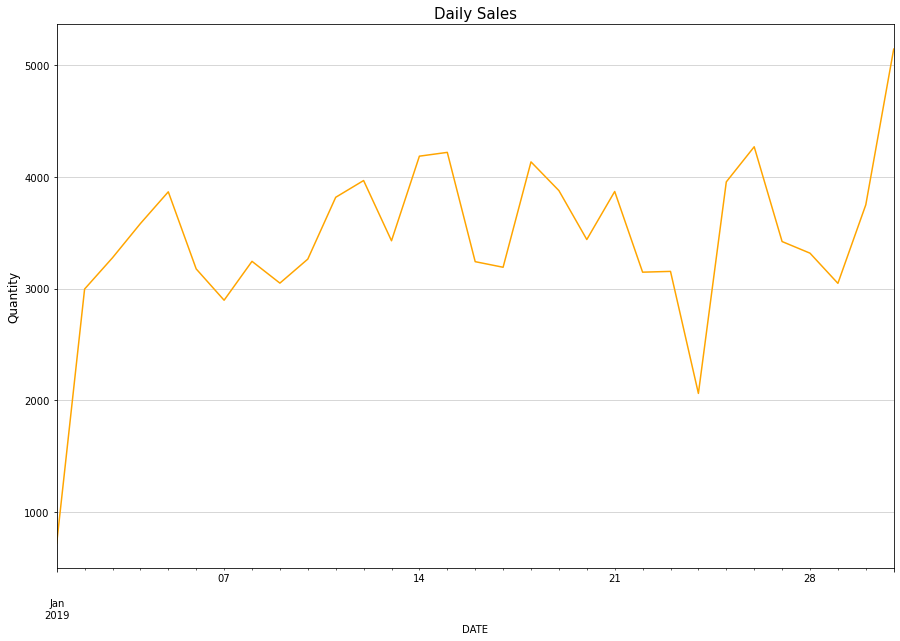

In [182]:
plt.figure(figsize=(15,10))
time_series_sales.plot(color='orange')
plt.title('Daily Sales', fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.grid(linewidth=0.5)
plt.show()

In [191]:
# Klasterisasi Customer
store_cluster = customer_clustering['Clustering'].value_counts()

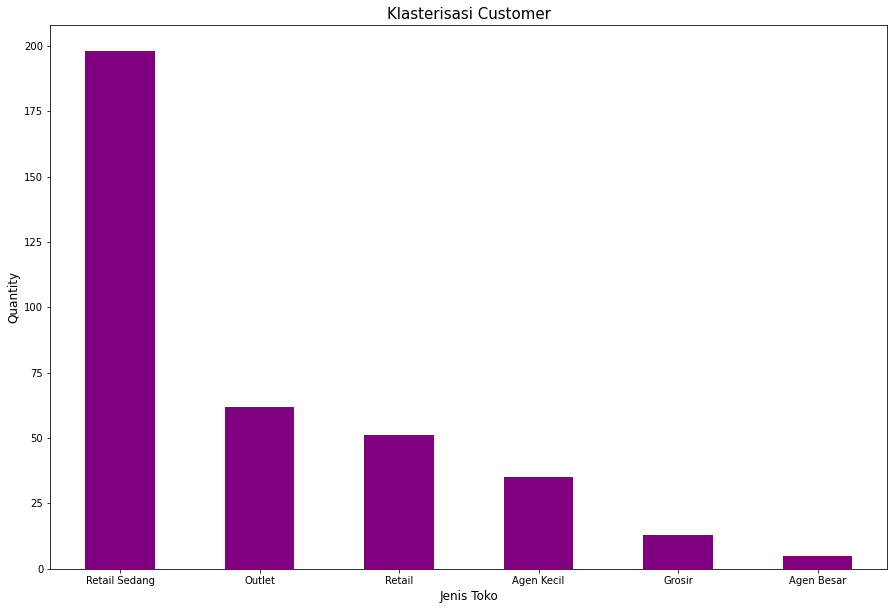

In [195]:
plt.figure(figsize=(15,10))
store_cluster.plot(kind='bar',color='purple')
plt.title('Klasterisasi Customer', fontsize=15)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Jenis Toko', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [196]:
# Top 10 Sales by Store
store_sales = data.groupby('STORE NAME 1')['QUANTITY'].sum()

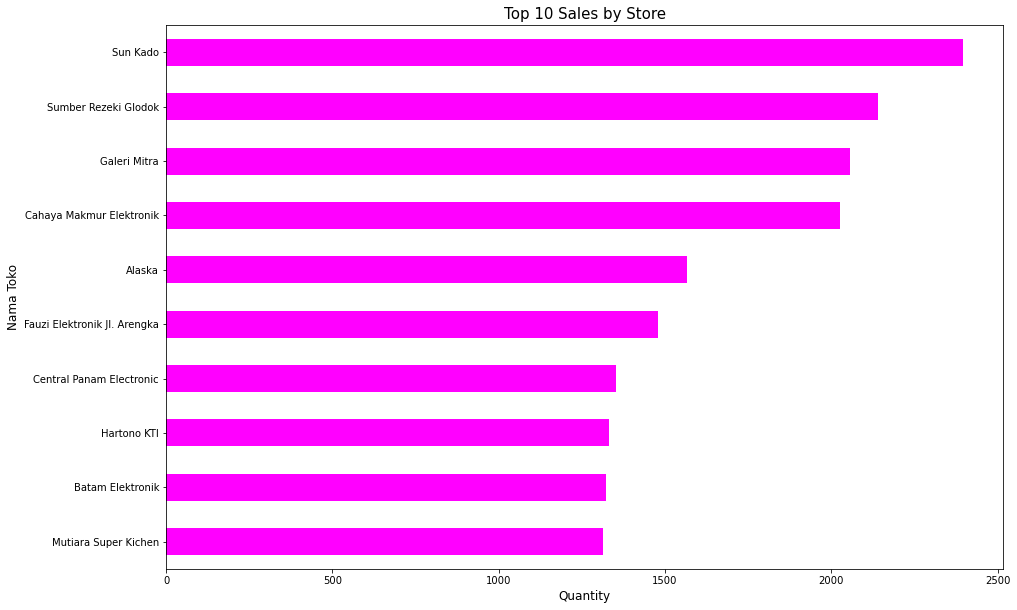

In [204]:
plt.figure(figsize=(15,10))
(store_sales.sort_values(ascending=False)).head(10).sort_values(ascending=True).plot(kind='barh',color='magenta')
plt.title('Top 10 Sales by Store', fontsize=15)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Nama Toko', fontsize=12)
plt.xticks(rotation=0)
plt.show()